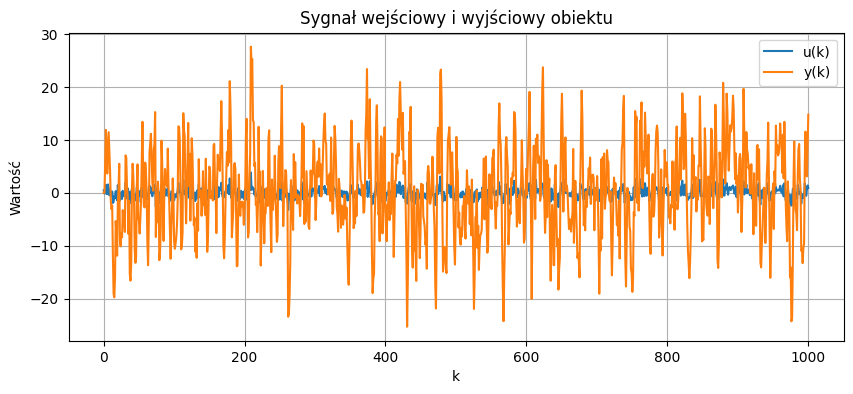

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

N = 1002
k = np.arange(N)

u = np.random.normal(0, 1, N)

a0 = 6
a1 = 5
a2 = 4

sigma = 0.2
z = np.random.normal(0, sigma, N)

y = np.zeros(N)
for i in range(2, N):
    y[i] = a0*u[i] + a1*u[i-1] + a2*u[i-2] + z[i]

plt.figure(figsize=(10,4))
plt.plot(k, u, label='u(k)')
plt.plot(k, y, label='y(k)')
plt.title('Sygnał wejściowy i wyjściowy obiektu')
plt.xlabel('k'); plt.ylabel('Wartość')
plt.grid(True); plt.legend()
plt.savefig('sygnal_we_wy.png')
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt


def metoda_offline_ols(u, y):
    Phi = np.column_stack((
        u[2:],    # u[k]
        u[1:-1],  # u[k-1]
        u[:-2]    # u[k-2]
    ))
    
    Y = y[2:]
    PhiT_Phi = Phi.T @ Phi
    inv_PhiT_Phi = np.linalg.inv(PhiT_Phi)
    PhiT_Y = Phi.T @ Y
    a_hat = inv_PhiT_Phi @ PhiT_Y
    
    return a_hat

a_est = metoda_offline_ols(u, y)

print("WYNIKI METODY OFFLINE (OLS)")
print(f"Parametr a0: Prawdziwy = {a0}, Oszacowany = {a_est[0]:.4f}")
print(f"Parametr a1: Prawdziwy = {a1}, Oszacowany = {a_est[1]:.4f}")
print(f"Parametr a2: Prawdziwy = {a2}, Oszacowany = {a_est[2]:.4f}")

WYNIKI METODY OFFLINE (OLS)
Parametr a0: Prawdziwy = 6, Oszacowany = 6.0018
Parametr a1: Prawdziwy = 5, Oszacowany = 5.0030
Parametr a2: Prawdziwy = 4, Oszacowany = 4.0084


In [3]:
def rls(u, y,lam=1, P0=1000):
    N = len(y)
    params_est = np.zeros((3,1))
    cov_matrix = np.eye(3) * P0
    params_history = np.zeros((N, 3))
    dif_hist = np.zeros(N)

    for i in range(2, N):
        regressor_vec = np.array([u[i], u[i-1], u[i-2]]).reshape(-1,1)
        yk = y[i]

        denom = lam + regressor_vec.T @ cov_matrix @ regressor_vec
        gain_vec = cov_matrix @ regressor_vec / denom
        diff = yk - regressor_vec.T @ params_est
        params_est = params_est + gain_vec * diff
        cov_matrix = (1/lam) * (cov_matrix - gain_vec @ regressor_vec.T @ cov_matrix)

        params_history[i,:] = params_est.flatten()
        dif_hist[i] = diff

    return params_history, dif_hist

C:\Users\mikol\AppData\Local\Temp\ipykernel_32100\3686917922.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dif_hist[i] = diff


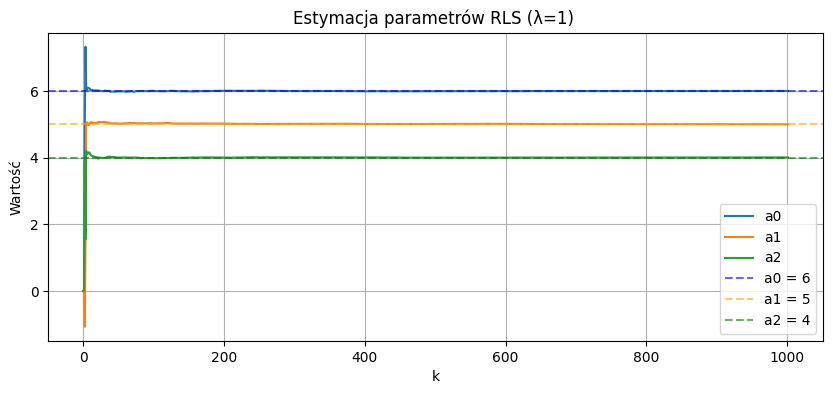

In [4]:
lam = 1
theta_hist, error_hist = rls(u, y, lam)

plt.figure(figsize=(10,4))
plt.plot(theta_hist[:,0], label='a0')
plt.plot(theta_hist[:,1], label='a1')
plt.plot(theta_hist[:,2], label='a2')
plt.axhline(a0, color='blue', linestyle='--', alpha=0.6, label='a0 = 6')
plt.axhline(a1, color='orange', linestyle='--', alpha=0.6, label='a1 = 5')
plt.axhline(a2, color='green', linestyle='--', alpha=0.6, label='a2 = 4')
plt.title(f'Estymacja parametrów RLS (λ={lam}) ')
plt.xlabel('k'); plt.ylabel('Wartość')
plt.grid(True); plt.legend()
plt.savefig('estymacja_rls_1.png')
plt.show()

C:\Users\mikol\AppData\Local\Temp\ipykernel_32100\916930897.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


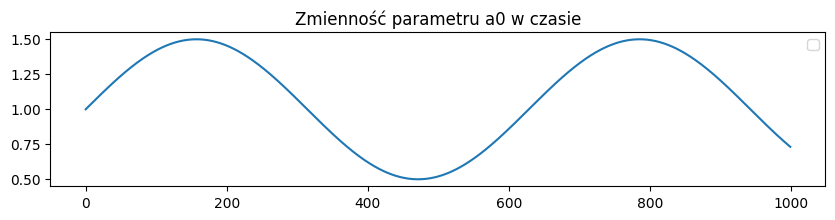

In [5]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
N = 1000
k_vec = np.arange(N)

u = np.random.normal(0, 1, N)

a1_const = 5
a2_const = 4

a0_time_variant = 1.0 + 0.5 * np.sin(0.01 * k_vec)

sigma = 0.2
z = np.random.normal(0, sigma, N)

y = np.zeros(N)
for k in range(2, N):
    y[k] = a0_time_variant[k] * u[k] + a1_const * u[k-1] + a2_const * u[k-2] + z[k]


plt.figure(figsize=(10, 2))
plt.plot(k_vec, a0_time_variant)
plt.title('Zmienność parametru a0 w czasie')
plt.legend()
plt.show()

C:\Users\mikol\AppData\Local\Temp\ipykernel_32100\3686917922.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dif_hist[i] = diff


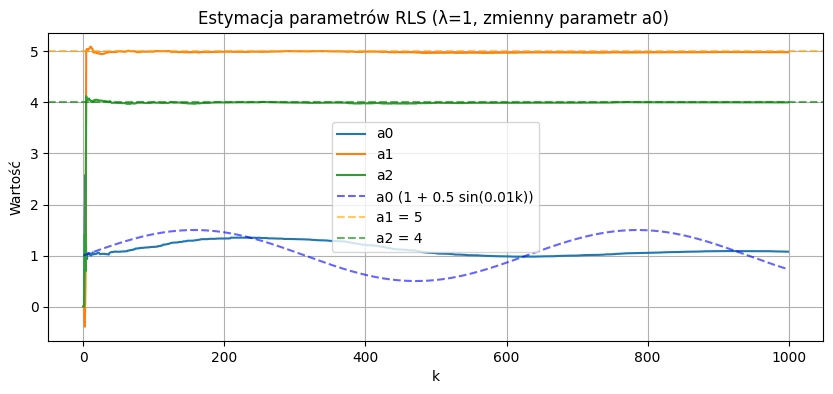

In [6]:
lam = 1
theta_hist, error_hist = rls(u, y, lam)

plt.figure(figsize=(10,4))
plt.plot(theta_hist[:,0], label='a0')
plt.plot(theta_hist[:,1], label='a1')
plt.plot(theta_hist[:,2], label='a2')
plt.plot(k_vec, a0_time_variant, color='blue', linestyle='--', alpha=0.6, label='a0 (1 + 0.5 sin(0.01k))')
plt.axhline(a1, color='orange', linestyle='--', alpha=0.6, label='a1 = 5')
plt.axhline(a2, color='green', linestyle='--', alpha=0.6, label='a2 = 4')
plt.title(f'Estymacja parametrów RLS (λ={lam}, zmienny parametr a0) ')
plt.xlabel('k'); plt.ylabel('Wartość')
plt.grid(True); plt.legend()
plt.savefig('estymacja_rls_zmienne1.png')
plt.show()

C:\Users\mikol\AppData\Local\Temp\ipykernel_32100\3686917922.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dif_hist[i] = diff


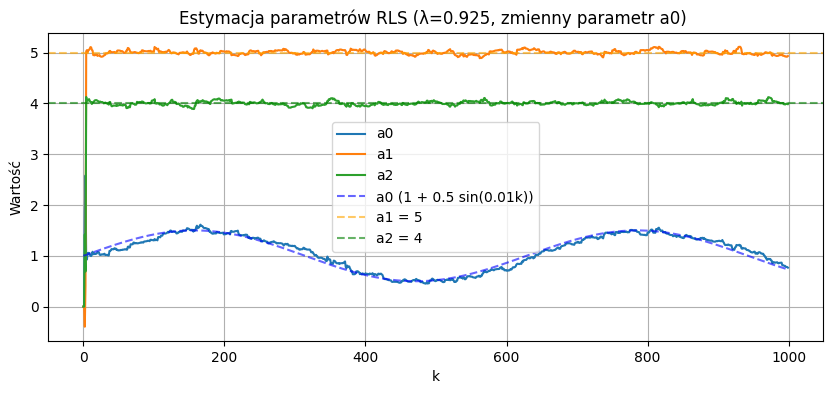

In [7]:
lam = 0.925
theta_hist, error_hist = rls(u, y, lam)

plt.figure(figsize=(10,4))
plt.plot(theta_hist[:,0], label='a0')
plt.plot(theta_hist[:,1], label='a1')
plt.plot(theta_hist[:,2], label='a2')
plt.plot(k_vec, a0_time_variant, color='blue', linestyle='--', alpha=0.6, label='a0 (1 + 0.5 sin(0.01k))')
plt.axhline(a1, color='orange', linestyle='--', alpha=0.6, label='a1 = 5')
plt.axhline(a2, color='green', linestyle='--', alpha=0.6, label='a2 = 4')
plt.title(f'Estymacja parametrów RLS (λ={lam}, zmienny parametr a0) ')
plt.xlabel('k'); plt.ylabel('Wartość')
plt.grid(True); plt.legend()
plt.savefig('estymacja_rls_zmienne925.png')
plt.show()

C:\Users\mikol\AppData\Local\Temp\ipykernel_32100\3686917922.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dif_hist[i] = diff


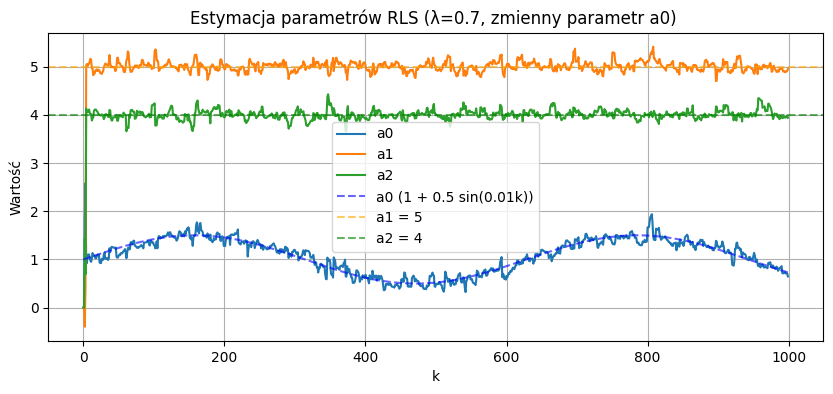

In [8]:
lam = 0.7
theta_hist, error_hist = rls(u, y, lam)

plt.figure(figsize=(10,4))
plt.plot(theta_hist[:,0], label='a0')
plt.plot(theta_hist[:,1], label='a1')
plt.plot(theta_hist[:,2], label='a2')
plt.plot(k_vec, a0_time_variant, color='blue', linestyle='--', alpha=0.6, label='a0 (1 + 0.5 sin(0.01k))')
plt.axhline(a1, color='orange', linestyle='--', alpha=0.6, label='a1 = 5')
plt.axhline(a2, color='green', linestyle='--', alpha=0.6, label='a2 = 4')
plt.title(f'Estymacja parametrów RLS (λ={lam}, zmienny parametr a0) ')
plt.xlabel('k'); plt.ylabel('Wartość')
plt.grid(True); plt.legend()
plt.savefig('estymacja_rls_zmienne7.png')
plt.show()

C:\Users\mikol\AppData\Local\Temp\ipykernel_32100\3686917922.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  dif_hist[i] = diff


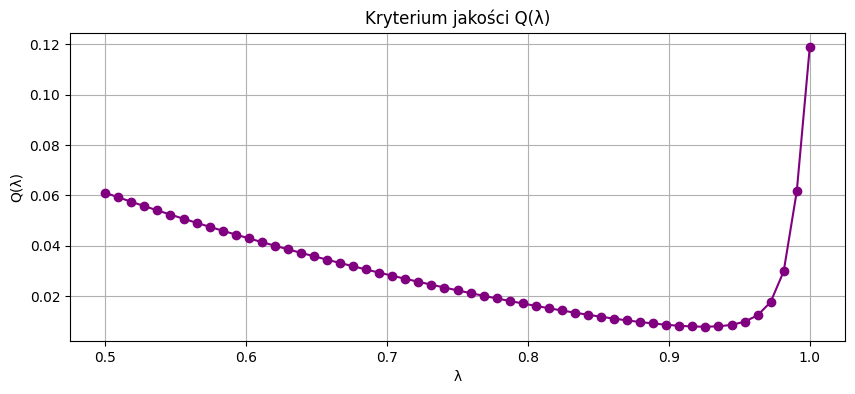

Optymalne λ: 0.926, Q = 0.007799


In [9]:
lambdas = np.linspace(0.5, 1, 55)
Q_vals = []

burn_in = 50


for lmbd in lambdas:
    theta_hist, _ = rls(u, y, lmbd)
    
    err_a0 = theta_hist[burn_in:, 0] - a0_time_variant[burn_in:]
    err_a1 = theta_hist[burn_in:, 1] - a1_const
    err_a2 = theta_hist[burn_in:, 2] - a2_const
    
    Q = np.mean(err_a0**2 + err_a1**2 + err_a2**2)
    
    Q_vals.append(Q)

opt_idx = int(np.argmin(Q_vals))
lam_opt = float(lambdas[opt_idx])


plt.figure(figsize=(10,4))
plt.plot(lambdas, Q_vals, marker='o', color='purple')
plt.title('Kryterium jakości Q(λ)')
plt.xlabel('λ'); plt.ylabel('Q(λ)')
plt.grid(True)
plt.savefig('jakosc.png')
plt.show()



print(f'Optymalne λ: {lam_opt:.3f}, Q = {Q_vals[opt_idx]:.6f}')